In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_pca_correlation_graph

# 主成分分析（PCA）

在本次实验中，我们在一个数据集上演示主成分分析（PCA）。

在本次实验中，我们对 `USArrests` 数据集进行主成分分析（PCA）。我们使用 `pd.read_csv()` 来获取数据。通过设置参数 `index_col=0`，我们将第一列用作行标签。

数据集的行包含按字母顺序排列的50个州。

In [2]:
USArrests = pd.read_csv("../Data/USArrests.csv", index_col=0)
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


数据集的列包含四个变量。

In [3]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

我们首先简要检查数据。我们注意到这些变量的均值差异很大。

In [4]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

DataFrame 具有多个用于计算按列汇总信息的有用方法。我们还可以使用 `var()` 方法来检查四个变量的方差。

不出所料，这些变量的方差也差异很大。变量 UrbanPop 衡量每个州生活在城市地区的人口比例，这与每个州每 100,000 人中的强奸案数量并不是一个可比的数值。PCA 会寻找能够解释数据集中大部分方差的派生变量。如果在执行 PCA 之前不对变量进行缩放，那么主成分将主要由 Assault 变量驱动，因为它的方差远远最大。因此，如果变量的单位不同或在尺度上差异很大，建议在执行 PCA 之前对变量进行标准化，使其标准差为一。通常我们也将均值设为零。

这种缩放可以通过上面导入的 `StandardScaler()` 变换来完成。我们首先使用 `fit` 方法对缩放器进行拟合，这将计算所需的均值和标准差，然后使用 `transform` 方法将其应用于我们的数据。与之前一样，我们使用 `fit_transform()` 方法将这些步骤合并。

In [5]:
scaler = StandardScaler(
    with_std=True, with_mean=True
)  # center and scale the data to unit variance
USArrests_scaled = scaler.fit_transform(USArrests)
covariance_matrix = np.cov(
    USArrests_scaled, rowvar=False
)  # check that the co-variance is standardizd. SO it is the correlatio matrix

print("Covariance Matrice: ")
print(covariance_matrix)
USA = pd.DataFrame(USArrests_scaled, columns=["Murder", "Assault", "UrbanPop", "Rape"])
USA.mean()
USA.cov()

Covariance Matrice: 
[[1.02040816 0.81823807 0.07099247 0.57508044]
 [0.81823807 1.02040816 0.2641548  0.67881758]
 [0.07099247 0.2641548  1.02040816 0.41973595]
 [0.57508044 0.67881758 0.41973595 1.02040816]]


,Murder,Assault,UrbanPop,Rape
Murder,1.020408,0.818238,0.070992,0.575080
Assault,0.818238,1.020408,0.264155,0.678818
UrbanPop,0.070992,0.264155,1.020408,0.419736
Rape,0.575080,0.678818,0.419736,1.020408


对数据进行缩放后，我们可以使用 `sklearn.decomposition` 包中的 `PCA()` 变换来执行主成分分析。

In [6]:
pcaUS = PCA()

（默认情况下，`PCA()` 变换会将变量中心化，使其均值为零，但不会对其进行缩放。）通过 `fit()` 返回的 PCA `scores` 可以使用变换 `pcaUS` 来找到。一旦调用了 `fit` 方法，`pcaUS` 对象还包含一些有用的量。

In [7]:
pcaUS.fit(USArrests_scaled)

PCA()

在拟合之后，`mean_` 属性对应于变量的均值。在这种情况下，由于我们使用 `scaler()` 对数据进行了中心化和缩放，因此所有均值都将为 0。

In [8]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

在 `pcaUS` 拟合之后，可以使用其 `transform()` 方法计算得分。我们打印在第一个主成分上权重为负的州。

In [9]:
scores = pcaUS.transform(USArrests_scaled)
USArrests.index[scores[:, 0] < 0]

Index(['Arkansas', 'Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Montana',
       'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='rownames')

可以使用 `fit_transform` 命令来同时完成这两个操作。

In [10]:
scores2 = pcaUS.fit_transform(USArrests_scaled)
USArrests.index[scores2[:, 0] < 0]

Index(['Arkansas', 'Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Montana',
       'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='rownames')

| 方法             | 目的                           | 语法                            | 示例                                      |
| ---------------- | ------------------------------ | ------------------------------- | ----------------------------------------- |
| fit()            | 学习并估计转换的参数           | estimator.fit(X)                | estimator.fit(train_data)                 |
| transform()      | 将学习到的转换应用于新数据     | transformed_data = estimator.transform(X) | transformed_data = estimator.transform(test_data) |
| fit_transform()  | 学习参数并将转换应用于新数据   | transformed_data = estimator.fit_transform(X) | transformed_data = estimator.fit_transform(data)   |

`components_` 属性提供了主成分载荷：`pcaUS.components_` 的每一行包含相应的主成分载荷向量。主成分载荷对应于数据协方差矩阵（标准化后）的特征向量。

In [11]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

## 方差比例

每个得分的方差可以通过 `pcaUS` 对象的 `explained_variance_` 属性直接提取。每个得分的方差对应于特征值。

In [12]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

感兴趣的主成分是方差大于 1 的主成分。要选择主成分的数量，我们可以查看解释的方差比例。每个主成分解释的方差比例（PVE）存储在 `explained_variance_ratio_` 属性中：

In [13]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

我们可以看到，第一个主成分解释了数据中 62.0% 的方差，第二个主成分解释了 24.7% 的方差，依此类推。我们可以绘制每个主成分解释的方差比例（PVE）以及累积的 PVE。首先，我们绘制解释的方差比例。

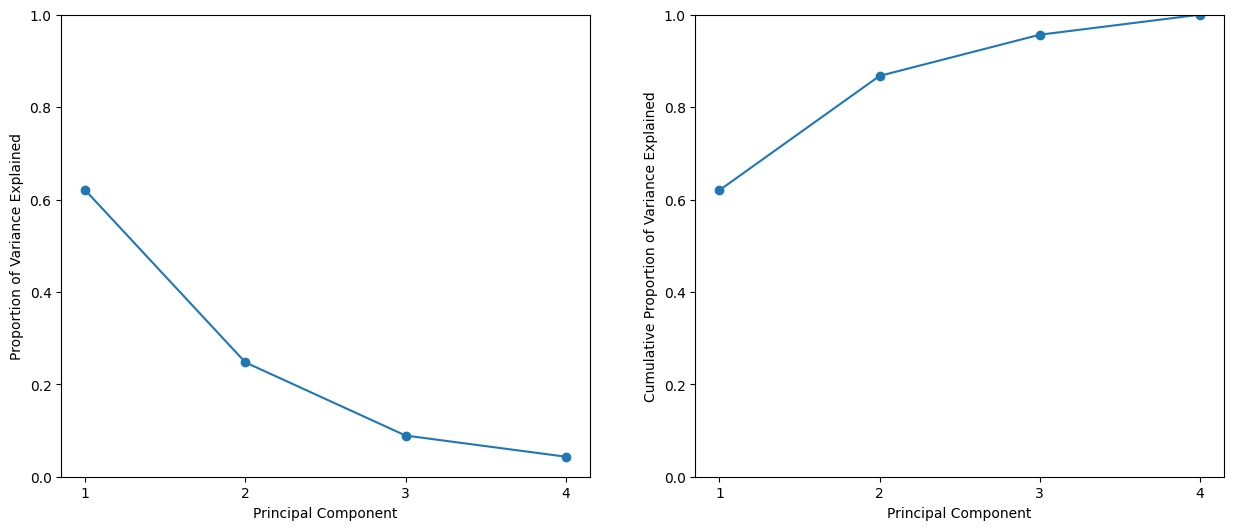

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_) + 1
ax = axes[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_, marker="o")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Proportion of Variance Explained")
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker="o")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Cumulative Proportion of Variance Explained")
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
plt.show()

The result is similar to that shown in Figure 12.3.  Note
that the method `cumsum()`   computes the cumulative sum of
the elements of a numeric vector. For instance:

In [15]:
a = np.array([1, 2, 8, -3])
np.cumsum(a)

array([ 1,  3, 11,  8])

## 观测值的可视化

以下 `plot` 是 PCA 常用的可视化方法之一。虽然它不是 `sklearn` 的标准部分，但有一些 Python 包可以生成此类图表。这里我们手动制作图表。由于前两个主成分解释了 80% 以上的方差，我们选择在由前两个载荷主成分生成的平面上绘制数据。

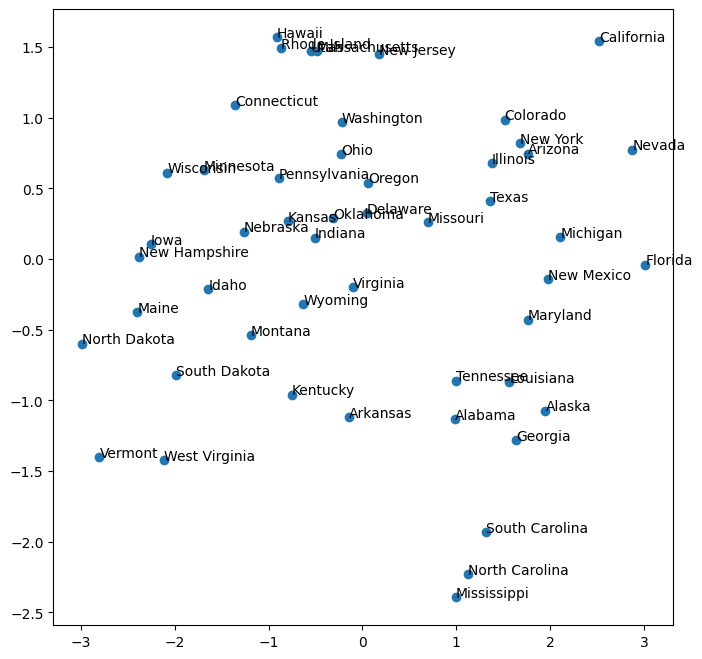

In [16]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
for k in range(scores.shape[0]):
    ax.text(scores[k, 0], scores[k, 1], USArrests.index[k])
plt.show()

请注意，此图是前一图通过 $y$ 轴的反射。请记住，主成分仅在符号变化上是唯一的，因此我们可以通过翻转第二组得分和载荷的符号来再现该图。

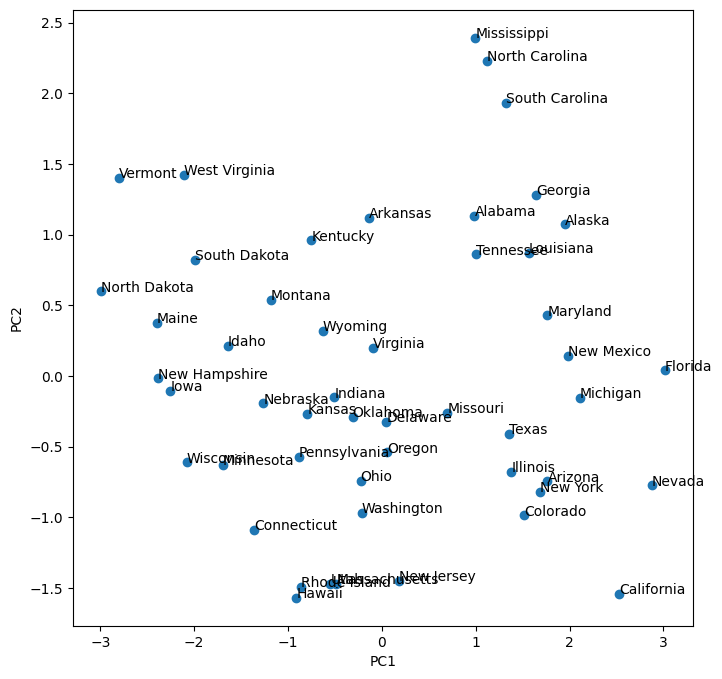

In [17]:
scores[:, 1] *= -1
pcaUS.components_[1] *= -1  # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
ax.set_xlabel("PC%d" % (i + 1))
ax.set_ylabel("PC%d" % (j + 1))
for k in range(scores.shape[0]):
    ax.text(scores[k, 0], scores[k, 1], USArrests.index[k])
plt.show()

主成分得分的标准差如下：

In [18]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

## 变量的可视化 - 相关性圆

我们可以通过计算原始变量与主成分之间的相关性来绘制相关性圆。我们提出了两种方法。

[(0.8439764403377673, 0.41603535286933135), (0.9184432365997452, 0.18702112807639293), (0.43811676457203924, -0.8683281865393464), (0.855839394424793, -0.16646019289024216)]
[0.85254495 0.92776777 0.44256476 0.86452834]
[ 0.42025917  0.18891987 -0.87714393 -0.16815019]


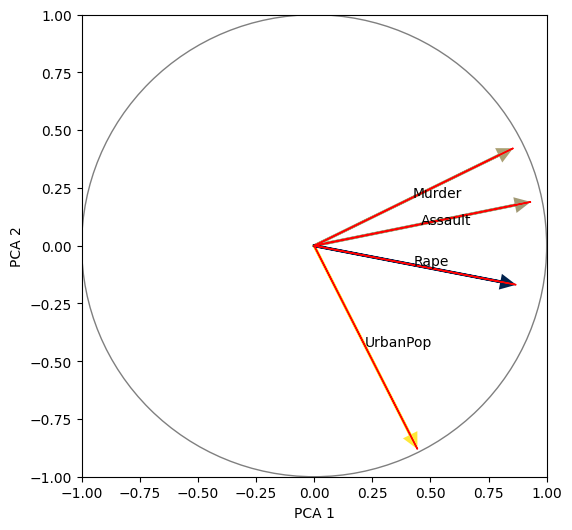

In [19]:
ccircle = []
eucl_dist = []
X = USArrests.to_numpy()
for i, j in enumerate(X.T):
    corr1 = np.corrcoef(j, scores[:, 0])[0, 1]
    corr2 = np.corrcoef(j, scores[:, 1])[0, 1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

fig, axs = plt.subplots(figsize=(6, 6))
# for i in enumerate(eucl_dist):
for i in range(4):

    arrow_col = plt.cm.cividis(
        (eucl_dist[i] - np.array(eucl_dist).min())
        / (np.array(eucl_dist).max() - np.array(eucl_dist).min())
    )  # pour colorier les flèches
    # suivant la distance
    axs.arrow(
        0,
        0,  # Arrows start at the origin
        ccircle[i][0],  # 0 for PC1
        ccircle[i][1],  # 1 for PC2
        lw=2,  # line width
        length_includes_head=True,
        color=arrow_col,
        fc=arrow_col,
        head_width=0.05,
        head_length=0.05,
    )
    axs.text(ccircle[i][0] / 2, ccircle[i][1] / 2, USArrests.columns[i])
# Draw the unit circle, for clarity
circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="k", linewidth=1, alpha=0.5)
axs.add_patch(circle)
axs.set_xlabel("PCA 1")
axs.set_ylabel("PCA 2")
axs.set_xlim([-1, 1])
axs.set_ylim([-1, 1])

# Draw the arrow using the formula
for k in range(pcaUS.components_.shape[1]):
    axs.arrow(
        0,
        0,
        np.sqrt(pcaUS.explained_variance_[0]) * pcaUS.components_[0, k],
        np.sqrt(pcaUS.explained_variance_[1]) * pcaUS.components_[1, k],
        color="r",
    )

# To check that the correlation is equal with the two methods
print(ccircle)
print(np.sqrt(pcaUS.explained_variance_[0]) * pcaUS.components_[0, :])
print(np.sqrt(pcaUS.explained_variance_[1]) * pcaUS.components_[1, :])
plt.show()

可以使用 `mlxtend.plotting` 包中的 `plot_pca_correlation_graph` 函数来获取相关性圆。

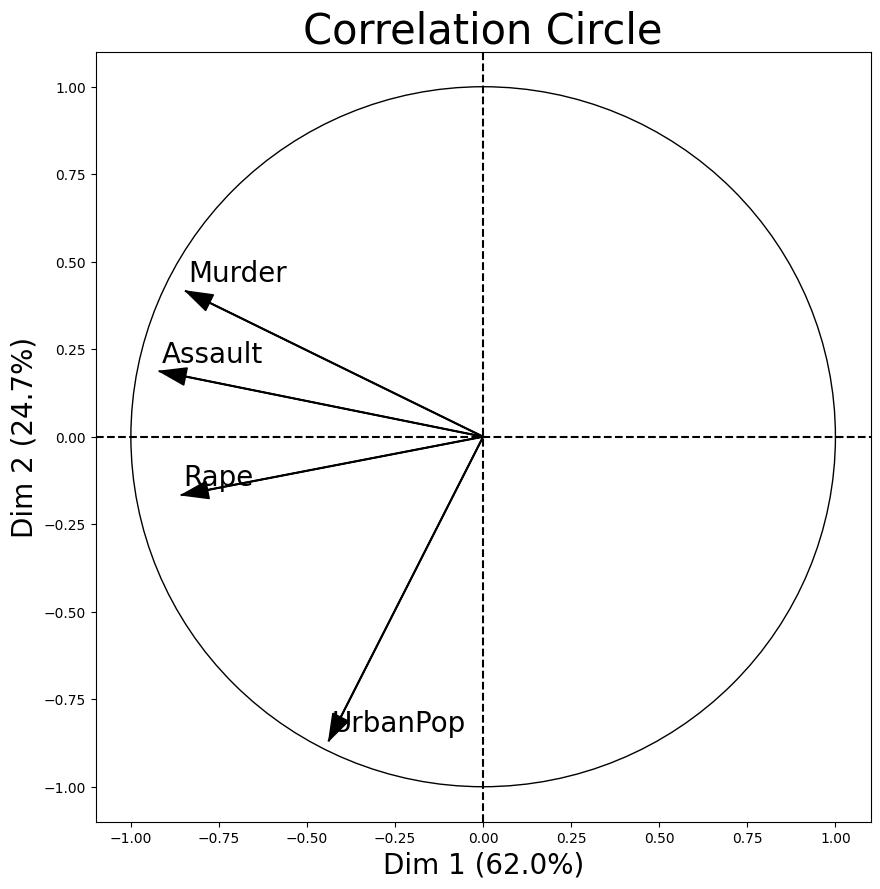

In [20]:
figure, correlation_matrix = plot_pca_correlation_graph(
    USArrests_scaled, USArrests.columns, dimensions=(1, 2), figure_axis_size=10
)

## 解释

我们可以看到，第一个载荷向量在 Assault、Murder 和 Rape 上的权重大致相等，但在 UrbanPop 上的权重要小得多。因此，该主成分大致对应于总体严重犯罪率的度量。第二个载荷向量的大部分权重集中在 UrbanPop 上，而在其他三个特征上的权重要小得多。因此，该主成分大致对应于州的城市化水平。

总体来看，我们发现与犯罪相关的变量（Murder、Assault 和 Rape）彼此靠近，而 UrbanPop 变量则远离其他三个变量。这表明犯罪相关变量之间是相互关联的——谋杀率高的州往往也有较高的袭击和强奸率——而 UrbanPop 变量与其他三个变量的相关性较低。

我们可以通过图 12.1 中的两个主成分得分向量来检查各州之间的差异。关于载荷向量的讨论表明，在第一个主成分上得分较高的州，如加利福尼亚、内华达和佛罗里达，犯罪率较高，而在第一个主成分上得分为负的州，如北达科他，犯罪率较低。加利福尼亚在第二个主成分上得分也较高，表明其城市化水平较高，而密西西比等州则相反。在两个主成分上得分接近零的州，如印第安纳，其犯罪和城市化水平均接近平均水平。